In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [4]:
data = pandas.read_csv('StudentStatistics.csv', sep = ';')
data.head()

,RespNr,Location,OAA_ObjCourse,OAA_ObjClass,OAA_CourseExec,OAA_RelActObj,OAA_RelActExa,OAA_RelObjExa,OAA_LearProcAct,OAA_LearProcPrep,...,Mix_IntDiscus,Mix_IntPrep,Mix_IntExcel,Over_Grade,Gen_Gender,Gen_Age,Gen_SecSchool,Gen_Classes,Gen_NumberSubj,Gen_Time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20


In [5]:
# H0 - There is no influence of location on marks obtained
# Ha - There is an influence of location on marks obtained

# grouping the nominal (Location) and the Scale (Over_Grade) together and performing mathematical operations

data.groupby('Location')['Over_Grade'].agg(['mean', 'median', 'std', 'min', 'max'])


,mean,median,std,min,max
Location,,,,,
Diemen,74.625000,70.0,14.536735,40.0,100.0
Haarlem,51.947368,45.0,19.432143,20.0,90.0
Rotterdam,47.153846,50.0,26.807481,10.0,98.0


In [6]:
rotterdamScores = data['Over_Grade'][data['Location']=='Rotterdam'].dropna()
diemenScores = data['Over_Grade'][data['Location']=='Diemen'].dropna()
haarlemScores = data['Over_Grade'][data['Location']=='Haarlem'].dropna()

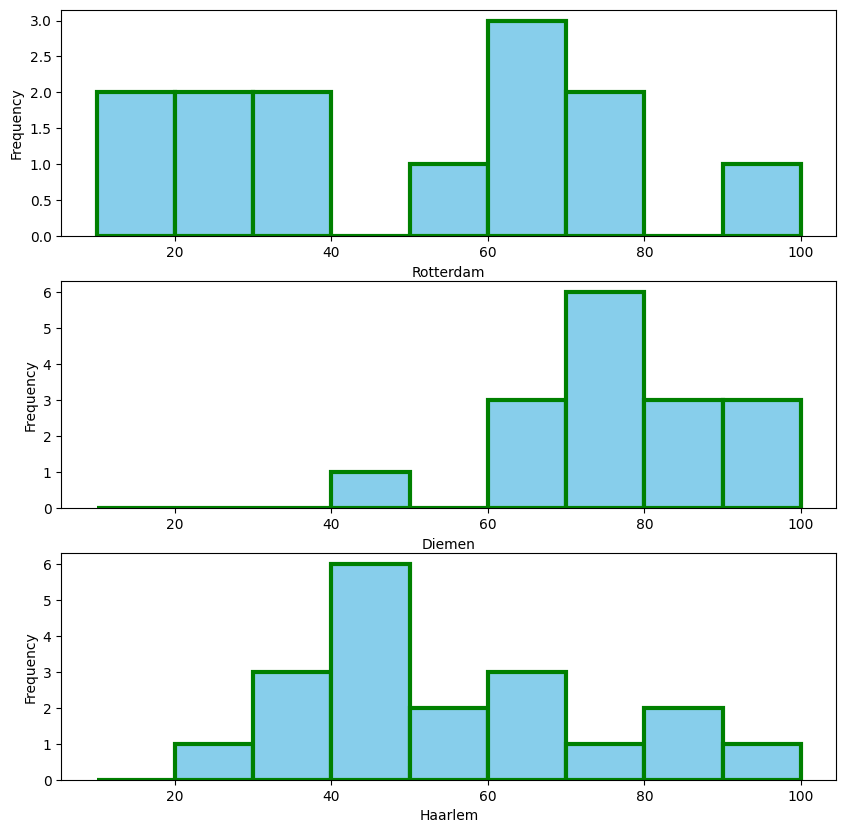

In [7]:
plt.figure(1, figsize=(10,10))

plt.subplot(3,1,1)
plt.hist(rotterdamScores, color='skyblue', edgecolor='green', lw=3, bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Rotterdam')
plt.ylabel('Frequency')

plt.subplot(3,1,2)
plt.hist(diemenScores, color='skyblue', edgecolor='green', lw=3, bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Diemen')
plt.ylabel('Frequency')


plt.subplot(3,1,3)
plt.hist(haarlemScores, color='skyblue', edgecolor='green', lw=3, bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Haarlem')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Welch ANOVA

!pip install pingouin
import pingouin as pin

In [10]:
pin.welch_anova(dv = 'Over_Grade', between = 'Location', data = data)

,Source,ddof1,ddof2,F,p-unc,np2
0,Location,2,26.071911,10.195117,0.000536,0.263336


In [11]:
pvalue = 0.000536

# Null hypothesis is rejected


In [12]:
# Calculating the effect size

eta_sq = 0.263336

if eta_sq < 0.01:
  print('Negligible')
elif eta_sq < 0.06:
  print('small')
elif eta_sq < 0.14:
  print('medium')
else:
  print('large')

large


Welsh ANOVA has found a influence of location on marks obtained p=0.000536 and further the influence is a large influence (eta_sq=0.26)